In [1]:
import tensorflow as tf

In [12]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import os

In [4]:
f_mnist = tf.keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = f_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [6]:
y_train_full.shape, y_train_full.dtype

((60000,), dtype('uint8'))

In [7]:
X_test.shape, X_test.dtype

((10000, 28, 28), dtype('uint8'))

In [8]:
X_valid, X_train = X_train_full[: 5000] / 255., X_train_full[5000: ]/255.
y_valid, y_train = y_train_full[: 5000], y_train_full[5000:]

X_test = X_test/255.

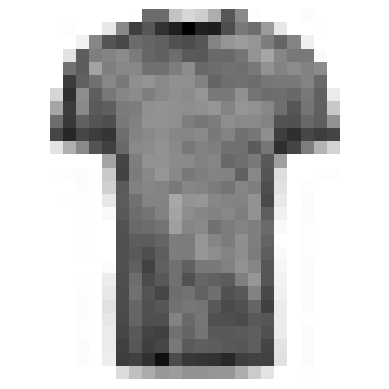

0

In [11]:
plt.imshow(X_train[45], cmap="binary")
plt.axis("off")
plt.show()
y_train[45]

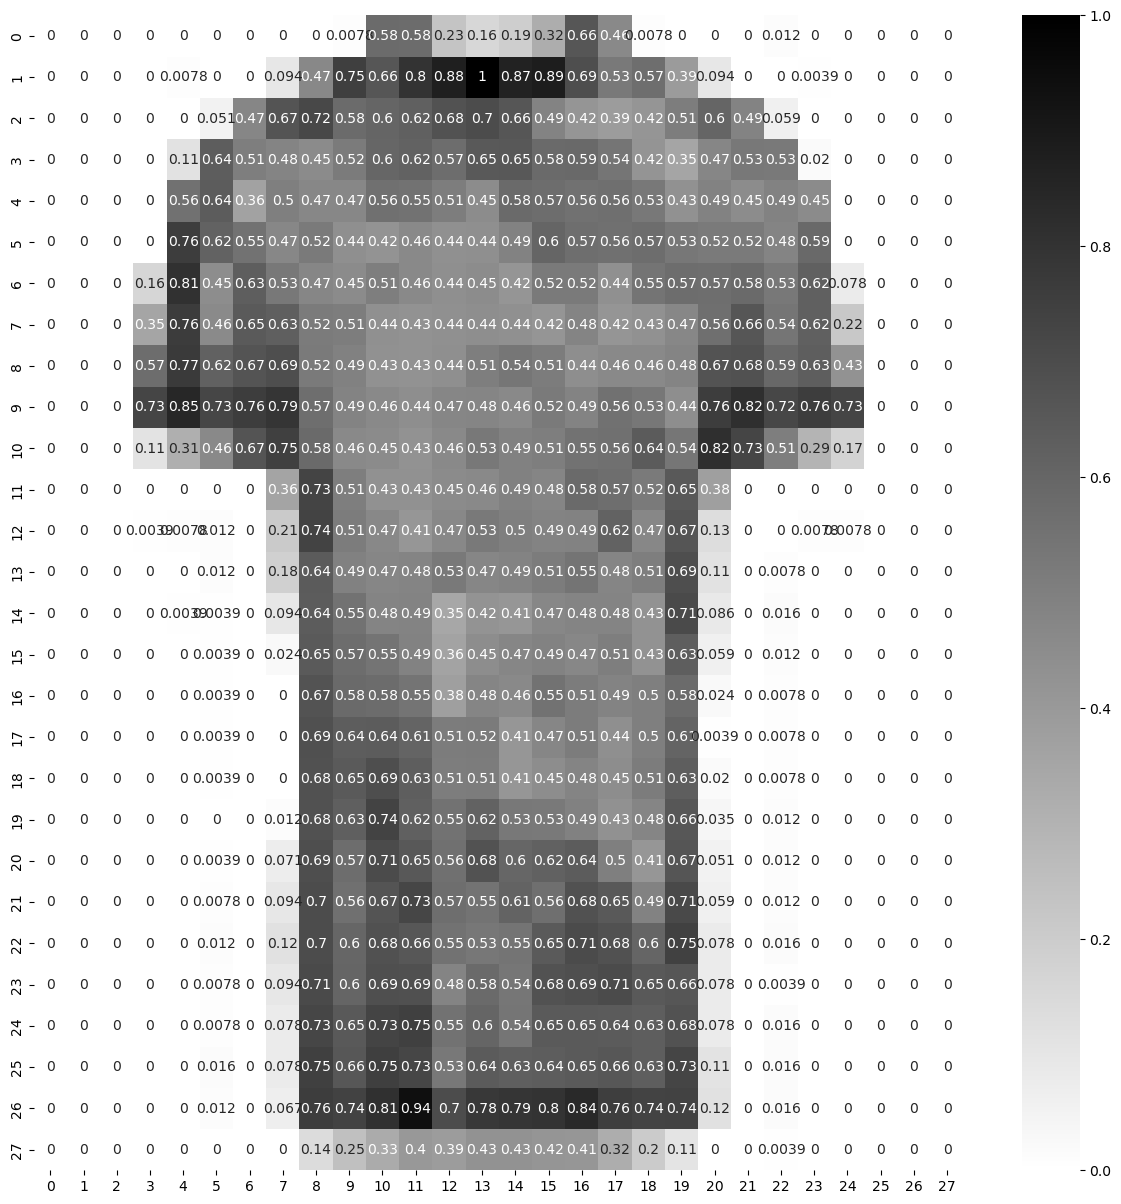

In [14]:

plt.figure(figsize=(15,15))
sns.heatmap(X_train[45], annot=True, cmap="binary")
plt.show()

In [16]:
LAYERS = [
    tf.keras.layers.Flatten(input_shape=[28, 28], name = 'inputLayer'),
    tf.keras.layers.Dense(300, activation='relu', name = 'hiddenLayer1'),
    tf.keras.layers.Dense(100, activation='relu', name = 'hiddenLayer2'),
    tf.keras.layers.Dense(10, activation='softmax', name ='outputLayer')
]

In [17]:
model = tf.keras.models.Sequential(LAYERS)
model.layers

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
hidden1 = model.layers[1]

model.get_layer(hidden1.name)

In [20]:
hidden1.get_weights()

[array([[-0.0424566 , -0.05970636, -0.0562527 , ...,  0.03823827,
         -0.0340557 , -0.06246908],
        [ 0.00113724,  0.05567884, -0.01228421, ..., -0.07099418,
         -0.04626032, -0.03464423],
        [ 0.00950666, -0.05435975, -0.04736713, ..., -0.03285106,
         -0.02418629, -0.02105818],
        ...,
        [ 0.01695537, -0.04823015,  0.04543516, ..., -0.04544933,
          0.02980635, -0.01307344],
        [-0.00601017, -0.031797  , -0.00456636, ...,  0.02895027,
          0.01173011, -0.07082571],
        [ 0.06712703, -0.0594002 , -0.04679136, ...,  0.01613843,
         -0.04074644,  0.06152837]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [21]:
weights, biases = hidden1.get_weights()

In [22]:
weights.shape

(784, 300)

In [23]:
biases.shape

(300,)

$loss\_function(actual, pred) = error$

In [25]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


### Important -

* **Epochs**: Integer. 
    
    Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided. 

* **batch_size**: Integer or None. 
    
    Number of samples per gradient update. If unspecified, batch_size will default to 32. 
    
    *NOTE:* Do not specify the batch_size if your data is in the form of datasets, generators, or keras.utils.Sequence instances (since they generate batches).

* **validation_batch_size**: Integer or None. 

    Number of samples per validation batch. 
    
    If unspecified, will default to batch_size. 
    
    *NOTE:* Do not specify the validation_batch_size if your data is in the form of datasets, generators, or keras.utils.Sequence instances (since they generate batches).

[Reference](https://www.tensorflow.org/api_docs/python/tf/keras/Model?hl=zh-tw#fit)

In [26]:
EPOCHS = 5
VALIDATION_SET = (X_valid, y_valid)

history = model.fit(X_train, y_train, 
                    epochs=EPOCHS, 
                    validation_data=VALIDATION_SET)

Epoch 1/5
1719/1719 [==============================] - 5s 2ms/step - loss: 0.7109 - accuracy: 0.7687 - val_loss: 0.4946 - val_accuracy: 0.8352
Epoch 2/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4838 - accuracy: 0.8326 - val_loss: 0.4320 - val_accuracy: 0.8546
Epoch 3/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4386 - accuracy: 0.8479 - val_loss: 0.4338 - val_accuracy: 0.8484
Epoch 4/5
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4119 - accuracy: 0.8573 - val_loss: 0.3976 - val_accuracy: 0.8670
Epoch 5/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3926 - accuracy: 0.8625 - val_loss: 0.3755 - val_accuracy: 0.8732


In [27]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4123 - accuracy: 0.8541


[0.41233858466148376, 0.8540999889373779]

In [28]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.710926,0.768745,0.494626,0.8352
1,0.483800,0.832582,0.431995,0.8546
2,0.438601,0.847891,0.433772,0.8484
3,0.411889,0.857255,0.397636,0.8670
4,0.392628,0.862545,0.375544,0.8732


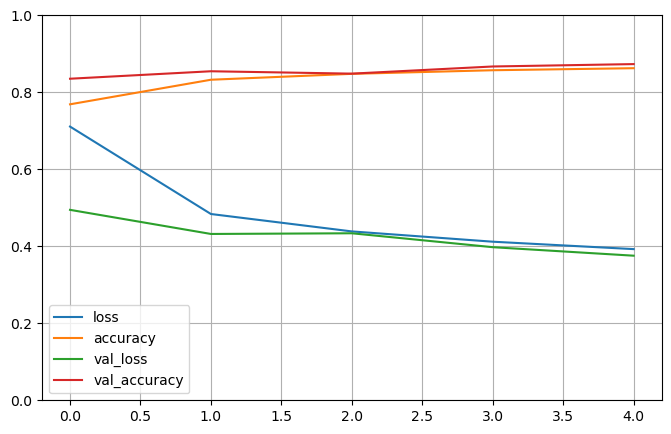

In [29]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## BN Approach one

In [30]:
del model

In [32]:
LAYER_BN_ONE = [
          tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer"),
          
]

In [33]:
model = tf.keras.models.Sequential(LAYER_BN_ONE)
model.layers

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 batch_normalization (Batch  (None, 784)               3136      
 Normalization)                                                  
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 batch_normalization_1 (Bat  (None, 300)               1200      
 chNormalization)                                                
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 batch_normalization_2 (Bat  (None, 100)              

In [35]:
784 * 4, 300 * 4, 100 * 4

(3136, 1200, 400)

In [36]:
BN_params = sum([784 * 4, 300 * 4, 100 * 4])
BN_params

4736

In [37]:
Trainable_BN_params = sum([784 * 4, 300 * 4, 100 * 4])/2
Trainable_BN_params ## Gamma, Beta

2368.0

In [38]:
Non_Trainable_BN_params = BN_params - Trainable_BN_params
Non_Trainable_BN_params ## Mean, std deviation

2368.0

In [39]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


In [41]:
%%time

EPOCHS = 5
VALIDATION_SET = (X_valid, y_valid)

history = model.fit(X_train, y_train, 
                    epochs=EPOCHS, 
                    validation_data=VALIDATION_SET)

Epoch 1/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3414 - accuracy: 0.8777 - val_loss: 0.3340 - val_accuracy: 0.8818
Epoch 2/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3176 - accuracy: 0.8848 - val_loss: 0.3262 - val_accuracy: 0.8862
Epoch 3/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2998 - accuracy: 0.8910 - val_loss: 0.3175 - val_accuracy: 0.8882
Epoch 4/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2872 - accuracy: 0.8957 - val_loss: 0.3055 - val_accuracy: 0.8910
Epoch 5/5
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2712 - accuracy: 0.9005 - val_loss: 0.3111 - val_accuracy: 0.8878
CPU times: total: 1min 28s
Wall time: 33.6 s


## BN Approach 2

In [42]:
del model

In [43]:
LAYER_BN_TWO = [
          tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(300, name="hiddenLayer1"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Activation("relu"),
          tf.keras.layers.Dense(100, name="hiddenLayer2"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Activation("relu"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer"),
          
]

In [45]:
model = tf.keras.models.Sequential(LAYER_BN_TWO)
model.layers

In [46]:
BN_layer_1 = model.layers[1]
BN_layer_1

In [47]:
for variable in BN_layer_1.variables:
  print(variable.name, variable.trainable)

batch_normalization_3/gamma:0 True
batch_normalization_3/beta:0 True
batch_normalization_3/moving_mean:0 False
batch_normalization_3/moving_variance:0 False


In [48]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 batch_normalization_3 (Bat  (None, 784)               3136      
 chNormalization)                                                
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 batch_normalization_4 (Bat  (None, 300)               1200      
 chNormalization)                                                
                                                                 
 activation (Activation)     (None, 300)               0         
                                                                 
 hiddenLayer2 (Dense)        (None, 100)              

In [49]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

In [50]:
EPOCHS = 5
VALIDATION_SET = (X_valid, y_valid)

history = model.fit(X_train, y_train, 
                    epochs=EPOCHS, 
                    validation_data=VALIDATION_SET)

Epoch 1/5
1719/1719 [==============================] - 7s 3ms/step - loss: 0.5792 - accuracy: 0.8051 - val_loss: 0.4002 - val_accuracy: 0.8606
Epoch 2/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4168 - accuracy: 0.8534 - val_loss: 0.3628 - val_accuracy: 0.8678
Epoch 3/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3722 - accuracy: 0.8682 - val_loss: 0.3390 - val_accuracy: 0.8776
Epoch 4/5
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3442 - accuracy: 0.8764 - val_loss: 0.3212 - val_accuracy: 0.8868
Epoch 5/5
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3221 - accuracy: 0.8851 - val_loss: 0.3190 - val_accuracy: 0.8844
